🎯 스터디 내용 🎯  
1. 결정트리
2. 교차 검증과 그리드 서치
3. 트리의 앙상블

🔍 사용할 알고리즘
1. 결정트리
2. 랜덤 포레스트
3. 엑스트라 트리
4. 그레이디언트 부스팅 ( 과제에는 없습니다! )
5. 히스토그램 기반 그레이디언트 부팅

---


> 강의 자료 참고하여 코드 작성 및 빈칸 채우시면 됩니다!

In [37]:
# wine 데이터를 가져오기
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data')

# wine데이터를 확인
wine.head()

# 와인의 데이터 프레임 확인
wine.shape

# 총 ____개의 샘플이 존재하고, 총 _개의 열을 갖는다.
# 총 6497개의 샘플이 존재하고, 총 4개의 열을 갖는다.

(6497, 4)

In [38]:
# 데이터 프레임을 넘파이 배열로 바꾸어서, 훈련 세트와 테스트 세트로 나누기
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

# 훈련 세트와 테스트 세트 분리
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42)

# 데이터 분리 후 확인
print("훈련 세트 크기:", train_input.shape, train_target.shape)
print("테스트 세트 크기:", test_input.shape, test_target.shape)

훈련 세트 크기: (5197, 3) (5197,)
테스트 세트 크기: (1300, 3) (1300,)


In [39]:
# 트리 학습 시켜보기 (깊이를 제한해서 그리기 : 최대 깊이 = 3)
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)

# 학습 결과 출력
print("훈련 세트 정확도:", dt.score(train_input, train_target))
print("테스트 세트 정확도:", dt.score(test_input, test_target))

# (+) 트리 시각화
# plt.figure(figsize=(20, 15))
# plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
# plt.show()

훈련 세트 정확도: 0.8454877814123533
테스트 세트 정확도: 0.8415384615384616


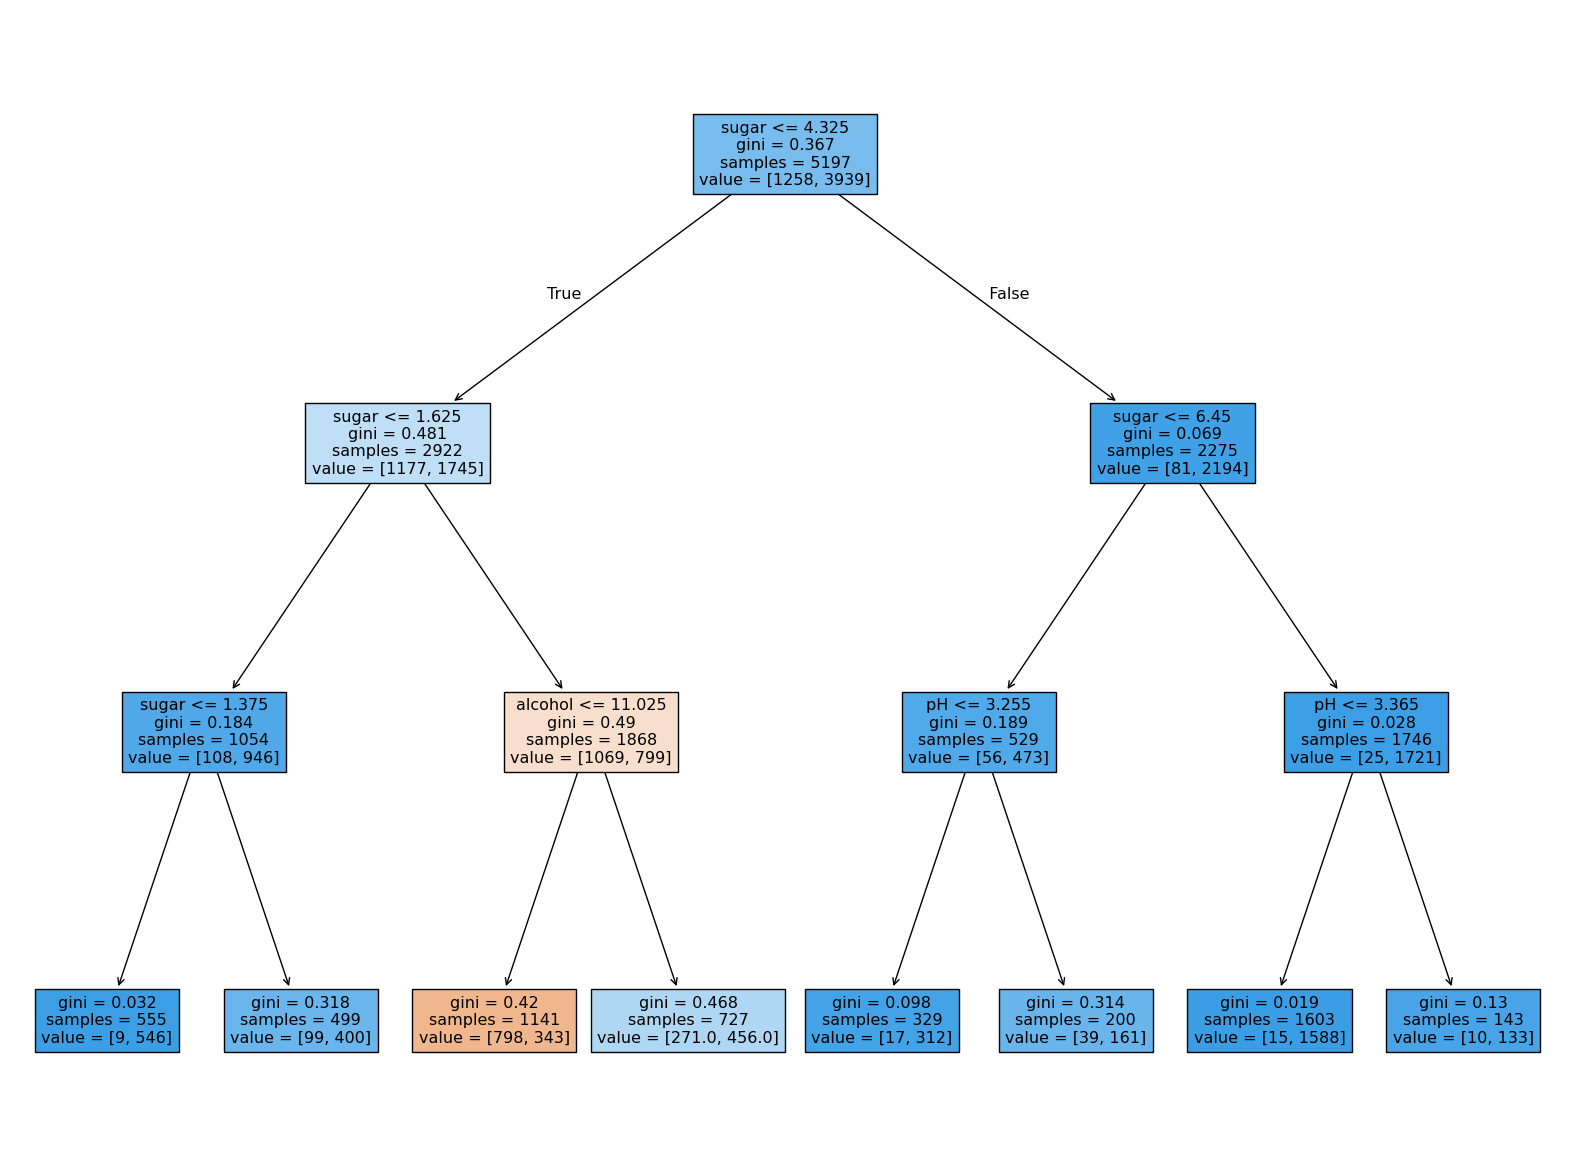

In [40]:
# 트리 모델 객체 그림으로 표현하기
plt.figure(figsize=(20, 15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

# 첫번째 노드 해석해보기 >> EX. 어떤 특성이  ~일 때, 무엇이다.
# sugar(당도) 특성이 4.325 이하라면, 데이터를 True로 취급하고 초과할 경우에는 False로 취급한다.
# 총 5,197개의 샘플이 있으며 이 중 1,258개는 레드, 3,939개는 화이트 와인이다.



---



In [41]:
# 결정 트리 모델로 교차 검증 해보기
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
import numpy as np

dt = DecisionTreeClassifier(max_depth=3, random_state=42)

# 교차 검증 수행 (기본, 5-폴드)
scores = cross_validate(dt, train_input, train_target, cv=5, return_train_score=True)

# 훈련 점수와 테스트 점수 평균 출력
print("훈련 세트 평균 점수:", np.mean(scores['train_score']))
print("검증 세트 평균 점수:", np.mean(scores['test_score']))

훈련 세트 평균 점수: 0.8468349022835433
검증 세트 평균 점수: 0.8412558303102096


In [42]:
# 그리드 서치 : ___ ____ __과 ____을 한번에 수행
# 그리드 서치 : 하이퍼 파라미터 탐색과 교차검증을 한번에 수행

from sklearn.model_selection import GridSearchCV

# 탐색할 매개변수와 탐색할 값의 리스트
params = {'min_impurity_decrease': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005]}

# 결정 트리 클래스의 객체 생성 및 전달
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)

gs.fit(train_input, train_target)

# 그리드 서치로 찾은 최적의 매개변수 출력하기
dt = gs.best_estimator_
print(dt.score(train_input, train_target))

0.9615162593804117




---



In [43]:
# RandomForestClassifier을 이용해 화이트 와인을 분류해보기
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs=-1, random_state=42)

# 성능 확인해보기
scores = cross_validate(rf, train_input, train_target, return_train_score=True, n_jobs=-1)

print("훈련 세트 평균 점수:", np.mean(scores['train_score']))
print("검증 세트 평균 점수:", np.mean(scores['test_score']))

# 특성 중요도 계산해보기
rf.fit(train_input, train_target)
print("\n특성 중요도:", rf.feature_importances_)

훈련 세트 평균 점수: 0.9973541965122431
검증 세트 평균 점수: 0.8905151032797809

특성 중요도: [0.23167441 0.50039841 0.26792718]


In [44]:
# 엑스트라 트리
# 랜덤 포레스트와 엑스트라 트리의 차이점은 _____ __을 사용하지 않는다는 점
# 랜덤 포레스트와 엑스트라 트리의 차이점은 부트스트랩 샘플을 사용하지 않는다는 점

#  ExtraTreesClassifier활용해서 학습시키기
from sklearn.ensemble import ExtraTreesClassifier

et = ExtraTreesClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(et, train_input, train_target, return_train_score=True, n_jobs=-1)

# 성능 확인해보기
print("훈련 세트 평균 점수:", np.mean(scores['train_score']))
print("검증 세트 평균 점수:", np.mean(scores['test_score']))

# 특성 중요도 계산해보기
et.fit(train_input, train_target)
print("\n특성 중요도:", et.feature_importances_)

훈련 세트 평균 점수: 0.9974503966084433
검증 세트 평균 점수: 0.8887848893166506

특성 중요도: [0.20183568 0.52242907 0.27573525]


In [46]:
# 히스토그램 기반 그레이디언트 부팅
# 특징 한가지 적어보기 >>
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.inspection import permutation_importance

# 학습시키기
hgb = HistGradientBoostingClassifier(random_state=42)
scores = cross_validate(hgb, train_input, train_target, return_train_score=True, n_jobs=-1)

# 성능 확인해보기
print("훈련 세트 평균 점수:", np.mean(scores['train_score']))
print("검증 세트 평균 점수:", np.mean(scores['test_score']))

hgb.fit(train_input, train_target)
print("테스트 세트 점수:", hgb.score(test_input, test_target))

# 특성 중요도 계산해보기
result = permutation_importance(hgb, train_input, train_target, n_repeats=10, random_state=42, n_jobs=-1)
print("\n훈련 세트 특성 중요도 평균:", result.importances_mean)
result_test = permutation_importance(hgb, test_input, test_target, n_repeats=10, random_state=42, n_jobs=-1)
print("테스트 세트 특성 중요도 평균:", result_test.importances_mean)

훈련 세트 평균 점수: 0.9321723946453317
검증 세트 평균 점수: 0.8801241948619236
테스트 세트 점수: 0.8723076923076923

훈련 세트 특성 중요도 평균: [0.08876275 0.23438522 0.08027708]
테스트 세트 특성 중요도 평균: [0.05969231 0.20238462 0.049     ]
